In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv('resturants.csv')
df.head()

,Unnamed: 0,restaurantsId,name,averageRating,establishmentTypeAndCuisineTags
0,0,Restaurant_Review-g304554-d5913736-Reviews-Tus...,Tuskers - Vegetarian Dining & Bar,4.5,Indian
1,1,Restaurant_Review-g304554-d21387580-Reviews-Fi...,Fiona,5.0,Italian Indian Bar Asian
2,2,Restaurant_Review-g304554-d10539996-Reviews-Da...,Dashanzi,5.0,Chinese Japanese Sushi Asian
3,3,Restaurant_Review-g304554-d2034920-Reviews-Nam...,Namak,5.0,Indian
4,4,Restaurant_Review-g304554-d8010527-Reviews-Sap...,Saptami,5.0,Indian


In [3]:
df.shape

(10020, 5)

In [8]:
df.averageRating.value_counts()

averageRating
5.0    5678
4.5    4342
Name: count, dtype: int64

In [4]:
df.name.value_counts()

name
Tuskers - Vegetarian Dining & Bar    334
Fiona                                334
Dashanzi                             334
Namak                                334
Saptami                              334
Mabruk                               334
FUMI - East Asian Spice Trail        334
Citrus Cafe                          334
Ummrao                               334
Kebabs & Kurries                     334
Jyran - Tandoor Dining & Lounge      334
Rasoi Kitchen & Bar                  334
Tanatan Shivaji Park                 334
Peshawri                             334
Nawab Saheb                          334
By the Mekong                        334
Yeda Republic                        334
The Brasserie                        334
Gallery Café                         334
Ark Bar                              334
Lotus Cafe                           334
Banjara The Restaurant               334
Dakshin Coastal                      334
Flamboyante                          334
Bombay High

In [5]:
df=df.drop(['restaurantsId','Unnamed: 0'],axis=1)

In [7]:
df.isnull().sum()

name                               0
averageRating                      0
establishmentTypeAndCuisineTags    0
dtype: int64

In [19]:
df2.establishmentTypeAndCuisineTags.value_counts()

establishmentTypeAndCuisineTags
Indian                                          4676
Italian Indian Bar Asian                         334
Chinese Japanese Sushi Asian                     334
Lebanese Mediterranean Middle Eastern            334
Chinese Japanese Sushi Asian Thai                334
Italian Indian Cajun & Creole European Asian     334
Indian Healthy                                   334
Asian Cantonese Szechuan Shanghai                334
Asian                                            334
Indian International Asian                       334
Indian International Asian Healthy               334
Bar Pub Fusion Wine Bar                          334
Indian Cafe International                        334
Indian Seafood Asian                             334
Bar                                              334
Indian International                             334
Indian Cafe International Asian                  334
Name: count, dtype: int64

In [25]:
y=pd.crosstab(df2['name'],df2['establishmentTypeAndCuisineTags'])

<Axes: xlabel='establishmentTypeAndCuisineTags', ylabel='name'>

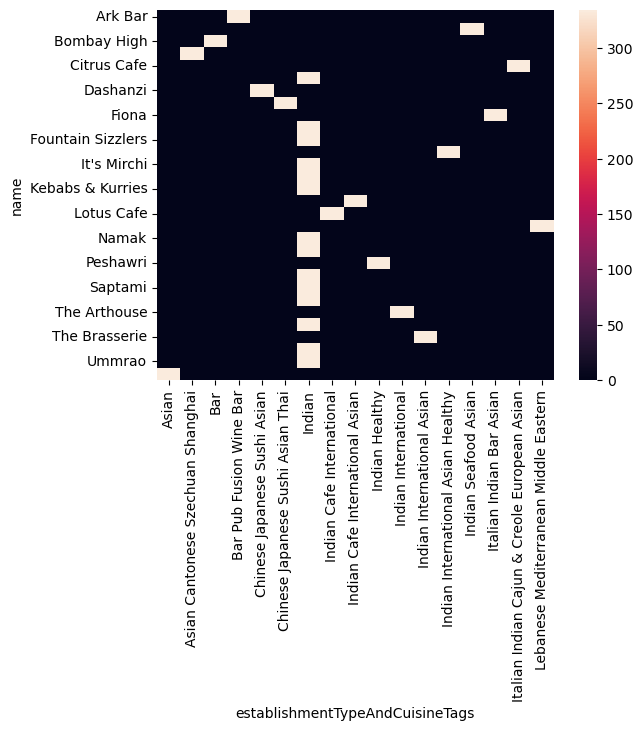

In [26]:
sns.heatmap(y)

In [24]:
# pd.get_dummies(df,columns=['name','establishmentTypeAndCuisineTags'],drop_first=True)

In [25]:
x=df.drop('averageRating',axis=1)
y=df['averageRating']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)   


In [27]:
from sklearn.compose import ColumnTransformer

In [28]:
transformer=ColumnTransformer(transformers=[
    ('t1',OneHotEncoder(drop='first'),['name']),
    ('t2',OneHotEncoder(drop='first'),['establishmentTypeAndCuisineTags'])
],remainder='passthrough')

In [33]:
x_train_new=transformer.fit_transform(x_train)

In [34]:
x_test_new=transformer.transform(x_test)

In [35]:
model=LinearRegression()
model.fit(x_train_new, y_train)
y_pred = model.predict(x_test_new)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))

MSE: 2.528179060254242e-13
R2 : 0.9999999999958941
